### problem 1

In [5]:
%reset -f
from functions import *
x1,x2,x3,x4,x5,x6 = sp.symbols('x1 x2 x3 x4 x5 x6')
DH = sp.Matrix([[x1, x2, -sp.Rational(3,4), 1],
                [x3,sp.Rational(1,4),x4,sp.sqrt(3)],
                [0,x5,x6,sp.Rational(1,3)],
                [0,0,0,1]])

def transformation_from_david_hartenberg_matrix(DH):
    T = sp.Matrix([[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]])
    for row in DH.tolist():
        print(row)
        theta, d, a, alpha = row
        T = T*sp.Matrix([[sp.cos(theta),-sp.sin(theta)*sp.cos(alpha),sp.sin(theta)*sp.sin(alpha),a*sp.cos(theta)],
                         [sp.sin(theta),sp.cos(theta)*sp.cos(alpha),-sp.cos(theta)*sp.sin(alpha),a*sp.sin(theta)],
                         [0,sp.sin(alpha),sp.cos(alpha),d],
                         [0,0,0,1]])
    return T

theta_sym, d_sym, a_sym, alpha_sym = sp.symbols('theta d a alpha')
peram = sp.Matrix([[theta_sym, d_sym, a_sym, alpha_sym]])
mat = transformation_from_david_hartenberg_matrix(peram)
display(mat)
display(DH)
eq1 = mat[0,3] - DH[0,3]
eq2 = mat[1,3] - DH[1,3]
eq3 = mat[2,3] - DH[2,3]
eq4 = mat[0,2] - DH[0,2]
eq5 = mat[1,1] - DH[1,1]
sol = sp.solve([eq1,eq2,eq3,eq4], [theta_sym, d_sym, a_sym, alpha_sym])[0]
display(sol)
DH_values = mat.subs({theta_sym:sol[0], d_sym:sol[1], a_sym:sol[2], alpha_sym:sol[3]})
display(DH_values.evalf(2))

[theta, d, a, alpha]


Matrix([
[cos(theta), -sin(theta)*cos(alpha),  sin(alpha)*sin(theta), a*cos(theta)],
[sin(theta),  cos(alpha)*cos(theta), -sin(alpha)*cos(theta), a*sin(theta)],
[         0,             sin(alpha),             cos(alpha),            d],
[         0,                      0,                      0,            1]])

Matrix([
[x1,  x2, -3/4,       1],
[x3, 1/4,   x4, sqrt(3)],
[ 0,  x5,   x6,     1/3],
[ 0,   0,    0,       1]])

(pi/3, 1/3, 2, -pi/3)

Matrix([
[ 0.5, -0.43, -0.75,  1.0],
[0.87,  0.25,  0.43,  1.7],
[   0, -0.87,   0.5, 0.33],
[   0,     0,     0,  1.0]])

### Problem 2

In [6]:
%reset -f
from functions import *
R = sp.Matrix([[0,1,0],[0,0,1],[1,0,0]])
t = sp.symbols('t')
theta1 = sp.Function('theta1')(t)
theta2 = sp.Function('theta2')(t)
theta3 = sp.Function('theta3')(t)

rot_x = sp.Matrix([[1,0,0],[0,sp.cos(theta1),-sp.sin(theta1)],[0,sp.sin(theta1),sp.cos(theta1)]])
rot_y = sp.Matrix([[sp.cos(theta2),0,sp.sin(theta2)],[0,1,0],[-sp.sin(theta2),0,sp.cos(theta2)]])
rot_z = sp.Matrix([[sp.cos(theta3),-sp.sin(theta3),0],[sp.sin(theta3),sp.cos(theta3),0],[0,0,1]])
Rot = rot_x*rot_y*rot_z
display(Rot)

R_02 = R*Rot
display(R_02)

skew = sp.simplify(R_02.diff(t)*R_02.inv())
display(skew)



Matrix([
[                                               cos(theta2(t))*cos(theta3(t)),                                                -sin(theta3(t))*cos(theta2(t)),                 sin(theta2(t))],
[sin(theta1(t))*sin(theta2(t))*cos(theta3(t)) + sin(theta3(t))*cos(theta1(t)), -sin(theta1(t))*sin(theta2(t))*sin(theta3(t)) + cos(theta1(t))*cos(theta3(t)), -sin(theta1(t))*cos(theta2(t))],
[sin(theta1(t))*sin(theta3(t)) - sin(theta2(t))*cos(theta1(t))*cos(theta3(t)),  sin(theta1(t))*cos(theta3(t)) + sin(theta2(t))*sin(theta3(t))*cos(theta1(t)),  cos(theta1(t))*cos(theta2(t))]])

Matrix([
[sin(theta1(t))*sin(theta2(t))*cos(theta3(t)) + sin(theta3(t))*cos(theta1(t)), -sin(theta1(t))*sin(theta2(t))*sin(theta3(t)) + cos(theta1(t))*cos(theta3(t)), -sin(theta1(t))*cos(theta2(t))],
[sin(theta1(t))*sin(theta3(t)) - sin(theta2(t))*cos(theta1(t))*cos(theta3(t)),  sin(theta1(t))*cos(theta3(t)) + sin(theta2(t))*sin(theta3(t))*cos(theta1(t)),  cos(theta1(t))*cos(theta2(t))],
[                                               cos(theta2(t))*cos(theta3(t)),                                                -sin(theta3(t))*cos(theta2(t)),                 sin(theta2(t))]])

Matrix([
[                                                                                                0,                               -sin(theta2(t))*Derivative(theta3(t), t) - Derivative(theta1(t), t), sin(theta1(t))*Derivative(theta2(t), t) + cos(theta1(t))*cos(theta2(t))*Derivative(theta3(t), t)],
[                               sin(theta2(t))*Derivative(theta3(t), t) + Derivative(theta1(t), t),                                                                                                 0, sin(theta1(t))*cos(theta2(t))*Derivative(theta3(t), t) - cos(theta1(t))*Derivative(theta2(t), t)],
[-sin(theta1(t))*Derivative(theta2(t), t) - cos(theta1(t))*cos(theta2(t))*Derivative(theta3(t), t), -sin(theta1(t))*cos(theta2(t))*Derivative(theta3(t), t) + cos(theta1(t))*Derivative(theta2(t), t),                                                                                                0]])

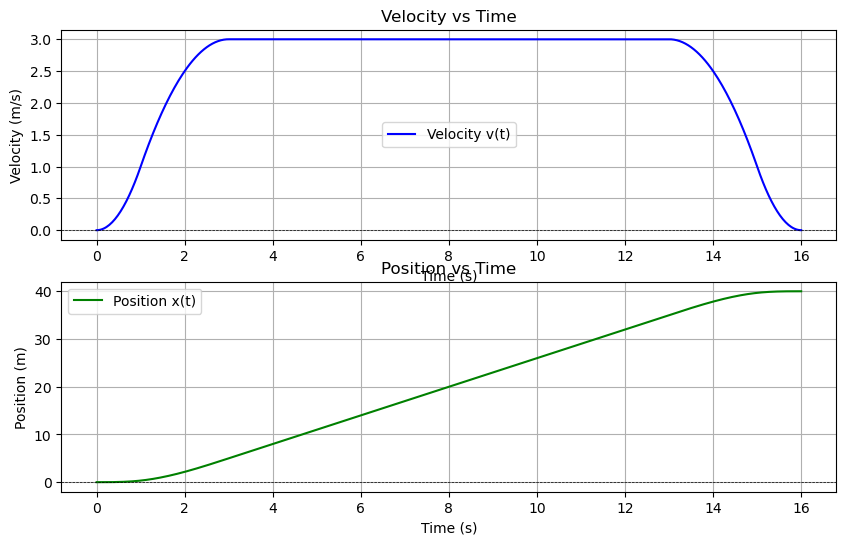

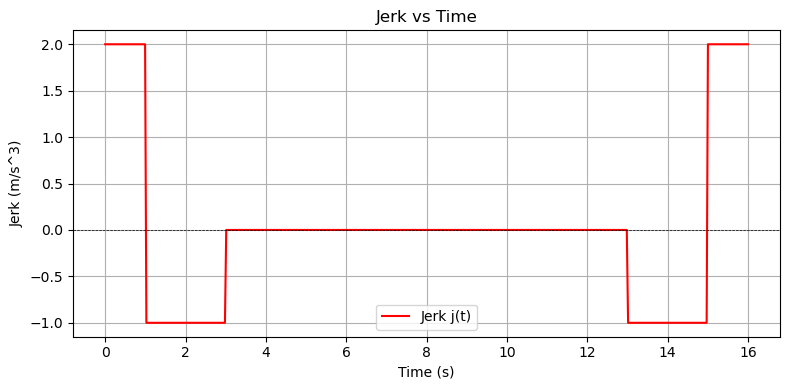

In [7]:
from sympy import symbols, Piecewise, Interval, integrate
import matplotlib.pyplot as plt
import numpy as np

# Define the variable and parameter
t = symbols('t', real=True)
T = symbols('T', real=True, positive=True)

# Define the piecewise function for acceleration
a_t = Piecewise(
    (2*t, Interval(0, 1, left_open=False, right_open=False).contains(t)),
    (3 - t, Interval(1, 3, left_open=False, right_open=False).contains(t)),
    (0, Interval(3, T, left_open=False, right_open=False).contains(t)),
    (T - t, Interval(T, T + 2, left_open=False, right_open=False).contains(t)),
    (2*t - 6 - 2*T, Interval(T + 2, T + 3, left_open=False, right_open=False).contains(t))
)

# Integrate acceleration to find velocity
v_t = integrate(a_t, t)

# Integrate velocity to find position
x_t = integrate(v_t, t)

jerk = a_t.diff(t)

# Define numerical values for T and the time range
T_value = 13  # Example value for T
time_range = np.linspace(0, T_value + 3, 500)

velocity = [float(v_t.subs({t: time, T: T_value})) for time in time_range]
position = [float(x_t.subs({t: time, T: T_value})) for time in time_range]
jerk = [float(jerk.subs({t: time, T: T_value})) for time in time_range]

# Plot the velocity and position
plt.figure(figsize=(10, 6))

# Velocity plot
plt.subplot(2, 1, 1)
plt.plot(time_range, velocity, label='Velocity v(t)', color='blue')
plt.title('Velocity vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.grid(True)
plt.legend()

# Position plot
plt.subplot(2, 1, 2)
plt.plot(time_range, position, label='Position x(t)', color='green')
plt.title('Position vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.grid(True)
plt.legend()

# Jerk plot
plt.figure(figsize=(8, 4))
plt.plot(time_range, jerk, label='Jerk j(t)', color='red')
plt.title('Jerk vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Jerk (m/s^3)')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.grid(True)
plt.legend()



plt.tight_layout()
plt.show()


In [11]:
%reset -f
from functions import *

p0 = sp.Matrix([0.25,0.25, 0.1])
px = sp.Matrix([0.4526,0.3357,0.1])
py = sp.Matrix([0.0942,0.6184,0.1])


T = Transformation_matrix_from_3_points(p0,px,py)
display(T)

Point_b = sp.Matrix([0.1,0.1,0.1,1])

T_BC = sp.Matrix([[1,0,0,0.3],[0,-1,0,0.1],[0,0,-1,0.9],[0,0,0,1]])
p_c = T_BC.inv()*Point_b
display(p_c.evalf(4))

principal_point = sp.Matrix([320,240])
fx, fy = 500, 500

r = -fx*p_c[0]/p_c[2] + principal_point[0]
c = -fy*p_c[1]/p_c[2] + principal_point[1]

display(r.evalf(4))
display(c.evalf(4))

Matrix([
[ 0.921, -0.3896,   0, 0.25],
[0.3896,   0.921,   0, 0.25],
[     0,       0, 1.0,  0.1],
[     0,       0,   0,  1.0]])

Matrix([
[-0.2],
[   0],
[ 0.8],
[ 1.0]])

445.0

240.0

### problem 5

In [9]:
%reset -f
import sympy as sp

Vin, ia, thetam_dot, thetam_dot_dot, taum, taul, eta, X = sp.symbols('Vin ia thetadot_m thetadotdot_m tau_m tau_l eta X')

Km = 0.7
Kb = 0.7
R = 100
Jm = 0.01
Dm = 0.003
l1 = sp.Eq( ia , (Vin - Kb*thetam_dot)/R)
l2 = sp.Eq( Jm*thetam_dot_dot + Dm*thetam_dot , taum - eta*taul)
l3 = sp.Eq( taum , Km*ia)
l4 = sp.Eq( X , thetam_dot/Vin)
sol = sp.solve([l1,l2,l3,l4], [X, thetam_dot, taum, Vin])

display(sol[0][0].subs({taul:0}))




10.0*(-70.0*ia + thetadotdot_m)/(-790.0*ia + 7.0*thetadotdot_m)

In [10]:
%reset -f
import sympy as sp
from sympy.abc import t, s, a
from sympy.integrals.transforms import laplace_transform
theta = sp.Function('theta')(t)
f = theta.diff(t,2) + 2*theta.diff(t) + 2*theta
lap = laplace_transform(f, t, s)[0]
display(lap)

s**2*LaplaceTransform(theta(t), t, s) + 2*s*LaplaceTransform(theta(t), t, s) - s*theta(0) + 2*LaplaceTransform(theta(t), t, s) - 2*theta(0) - Subs(Derivative(theta(t), t), t, 0)